# AI-Image-Detector

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import cv2

## Data Structure

In [ ]:
base_dir = '../dataset/'
train_df = pd.read_csv(os.path.join(base_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(base_dir, 'test.csv'))

In [3]:
print("train_df shape: ", train_df.shape)
print(train_df.head())

train_df shape:  (79950, 3)
   Unnamed: 0                                        file_name  label
0           0  train_data/a6dcb93f596a43249135678dfcfc17ea.jpg      1
1           1  train_data/041be3153810433ab146bc97d5af505c.jpg      0
2           2  train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg      1
3           3  train_data/8542fe161d9147be8e835e50c0de39cd.jpg      0
4           4  train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg      1


In [4]:
print("test_df shape: ", test_df.shape)
print(test_df.head())

test_df shape:  (5540, 1)
                                                  id
0  test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1  test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2  test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3  test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4  test_data_v2/a16495c578b7494683805484ca27cf9f.jpg


In [5]:
# for consistency with the train data
test_df = test_df.rename(columns={'id': 'file_name'})
train_df = train_df.drop(columns=['Unnamed: 0'])

### Modify Image Path

In [6]:
def modify_image_path(df):
    # Modify the file_name to have the full path
    df['file_name'] = df['file_name'].apply(lambda x: os.path.join(base_dir, x))
    return df


train_df = modify_image_path(train_df)
test_df = modify_image_path(test_df)

print(train_df.head())
print(test_df.head())

                                           file_name  label
0  ./dataset/train_data/a6dcb93f596a43249135678df...      1
1  ./dataset/train_data/041be3153810433ab146bc97d...      0
2  ./dataset/train_data/615df26ce9494e5db2f70e57c...      1
3  ./dataset/train_data/8542fe161d9147be8e835e50c...      0
4  ./dataset/train_data/5d81fa12bc3b4cea8c94a6700...      1
                                           file_name
0  ./dataset/test_data_v2/1a2d9fd3e21b4266aea1f66...
1  ./dataset/test_data_v2/ab5df8f441fe4fbf9dc9c6b...
2  ./dataset/test_data_v2/eb364dd2dfe34feda0e5246...
3  ./dataset/test_data_v2/f76c2580e9644d85a741a42...
4  ./dataset/test_data_v2/a16495c578b749468380548...


### Show Sample Images

function taken from https://www.kaggle.com/code/sheemamasood/ai-vs-human-convnextnswintranformers-techpulse

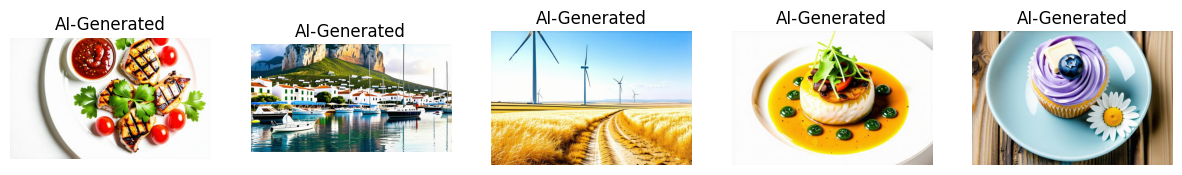

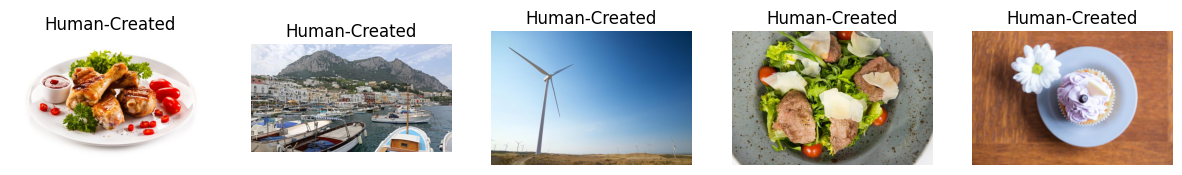

In [24]:
def show_images(df, label, num_images=5):
    sample_images = df[df["label"] == label].sample(num_images, random_state=42)["file_name"].values

    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(sample_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title("AI-Generated" if label == 1 else "Human-Created")
        
    plt.show()

# Show AI-Generated Images
show_images(train_df, label=1)

# Show Human-Created Images
show_images(train_df, label=0)

## Exploratory Data Analysis

### Checking for Missing and Duplicate Values

In [25]:
print("Checking for missing values in the dataset:\n")

print("Train Data:\n", train_df.isnull().sum())
print("Test Data:\n", test_df.isnull().sum())

print("Checking for duplicates:")

print("Train Data: ", train_df.duplicated().sum())
print("Test Data: ", test_df.duplicated().sum())


Checking for missing values in the dataset:

Train Data:
 file_name    0
label        0
dtype: int64
Test Data:
 file_name    0
dtype: int64
Checking for duplicates:
Train Data:  0
Test Data:  0


In [26]:
print("Checking the distribution of the labels in the train data:")

print(train_df["label"].value_counts())

Checking the distribution of the labels in the train data:
label
1    39975
0    39975
Name: count, dtype: int64


### Class Distribution

We can observe that the distrubition of target label is even. This is expected because the dataset has paired sets of Human and AI generated images.

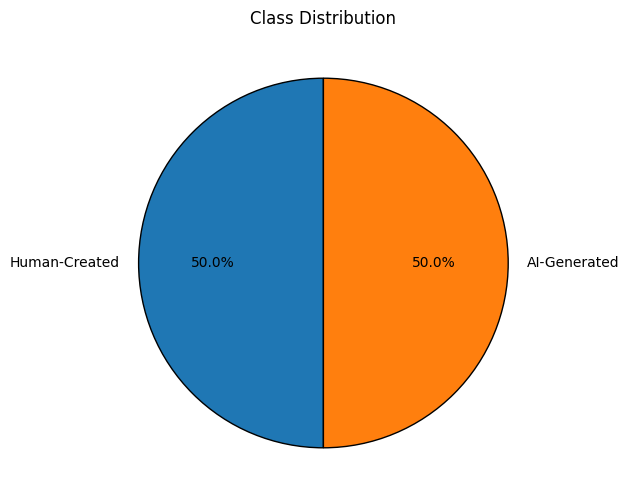

In [27]:
# Plot class distribution
def plot_class_distribution(df):    
    plt.figure(figsize=(6, 6))
    plt.pie(df["label"].value_counts(), labels=['Human-Created', 'AI-Generated'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title('Class Distribution')
    plt.show()
    

plot_class_distribution(train_df)


### Image Dimensions Distribution

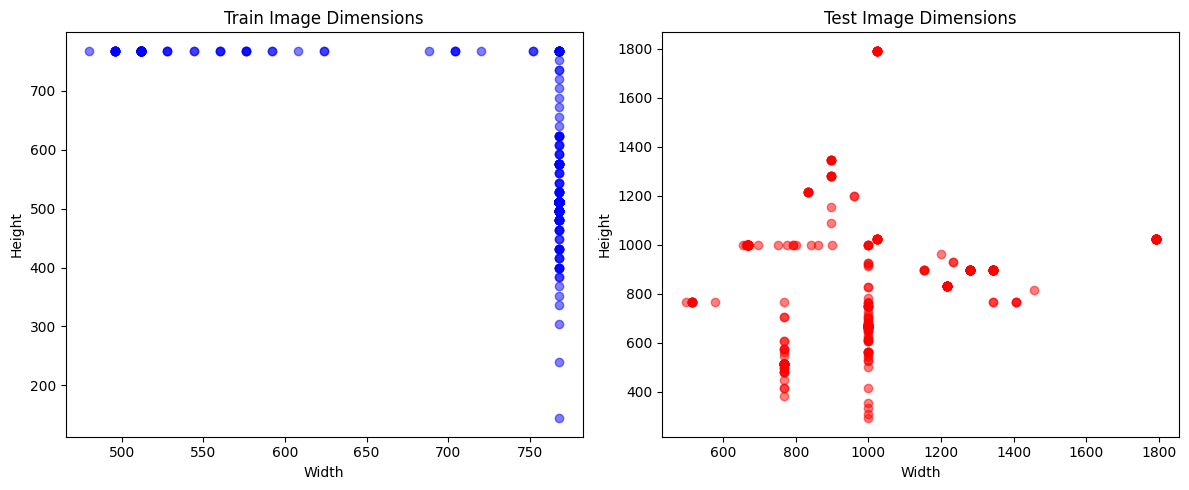

In [28]:
# Helper function for getting image dimensions
def get_image_dimension(image_path, sample_size=500):
    image_dimensions = []
    
    image_paths = image_path.sample(sample_size, random_state=42)

    for image_path in image_paths:
        img = cv2.imread(image_path)
        h, w, _ = img.shape
        image_dimensions.append((w, h))
    
    return pd.DataFrame(image_dimensions, columns=['width', 'height'])

# Plot train and test image dimensions
def plot_train_test_image_dimension(train_df, test_df, sample_size=500):
    train_image_dimensions = get_image_dimension(train_df['file_name'])
    test_image_dimensions = get_image_dimension(test_df['file_name'])
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    axes[0].scatter(train_image_dimensions['width'], train_image_dimensions['height'], alpha=0.5, c='blue', marker='o')
    axes[0].set_xlabel('Width')
    axes[0].set_ylabel('Height')
    axes[0].set_title('Train Image Dimensions')

    axes[1].scatter(test_image_dimensions['width'], test_image_dimensions['height'], alpha=0.5, c='red', marker='o')
    axes[1].set_xlabel('Width')
    axes[1].set_ylabel('Height')
    axes[1].set_title('Test Image Dimensions')

    plt.tight_layout()
    plt.show()

plot_train_test_image_dimension(train_df, test_df)

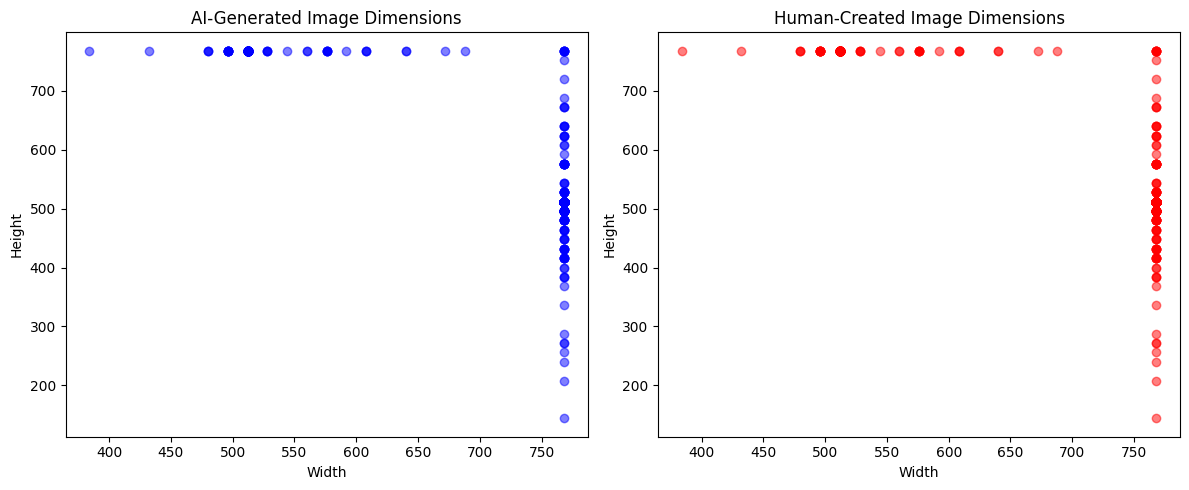

In [29]:


# Plot AI-Generated and Human-Created image dimensions in the training dataset
def plot_ai_human_image_dimension(df, sample_size=500):
    ai_image_dimensions = get_image_dimension(df[df['label'] == 1]['file_name'], sample_size)
    human_image_dimensions = get_image_dimension(df[df['label'] == 0]['file_name'], sample_size)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    axes[0].scatter(ai_image_dimensions['width'], ai_image_dimensions['height'], alpha=0.5, c='blue', marker='o')
    axes[0].set_xlabel('Width')
    axes[0].set_ylabel('Height')
    axes[0].set_title('AI-Generated Image Dimensions')

    axes[1].scatter(human_image_dimensions['width'], human_image_dimensions['height'], alpha=0.5, c='red', marker='o')
    axes[1].set_xlabel('Width')
    axes[1].set_ylabel('Height')
    axes[1].set_title('Human-Created Image Dimensions')

    plt.tight_layout()
    plt.show()

plot_ai_human_image_dimension(train_df)

In [30]:
# Quick check to see if the image dimensions are the same for AI-Generated and Human-Created images
ai_image_dimensions = get_image_dimension(train_df[train_df['label'] == 1]['file_name'], 39975)
human_image_dimensions = get_image_dimension(train_df[train_df['label'] == 0]['file_name'], 39975)

print((ai_image_dimensions['width'] == human_image_dimensions['width']).sum())
print((ai_image_dimensions['height'] == human_image_dimensions['height']).sum())

39975
39975


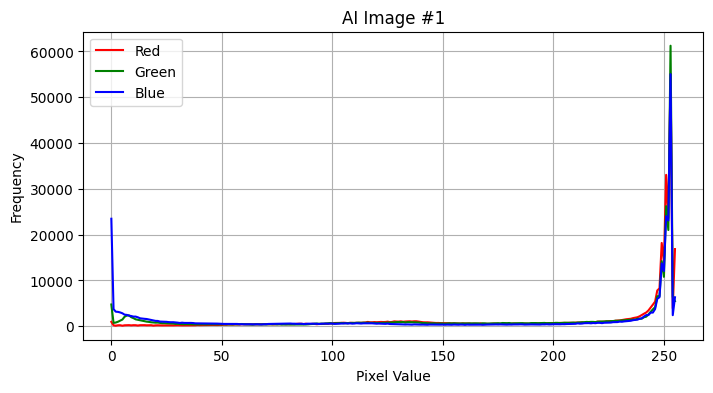

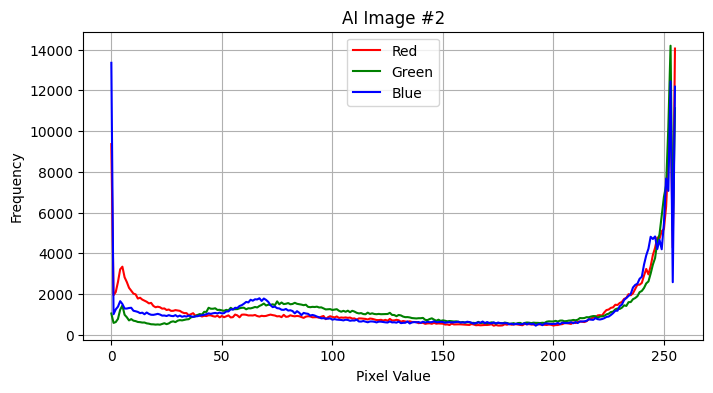

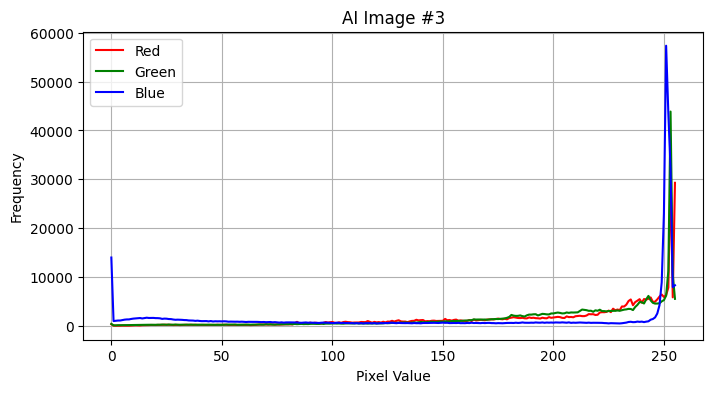

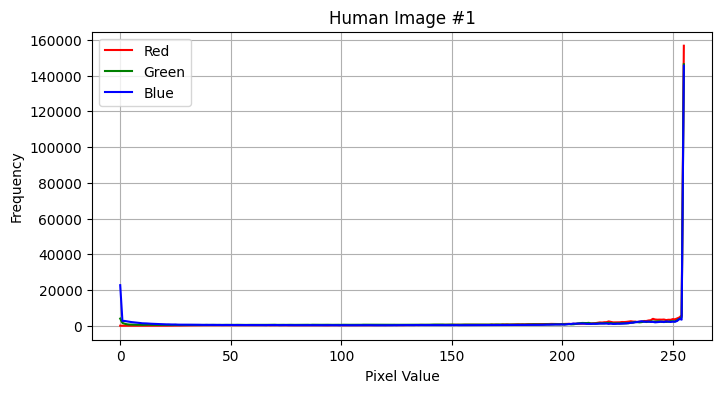

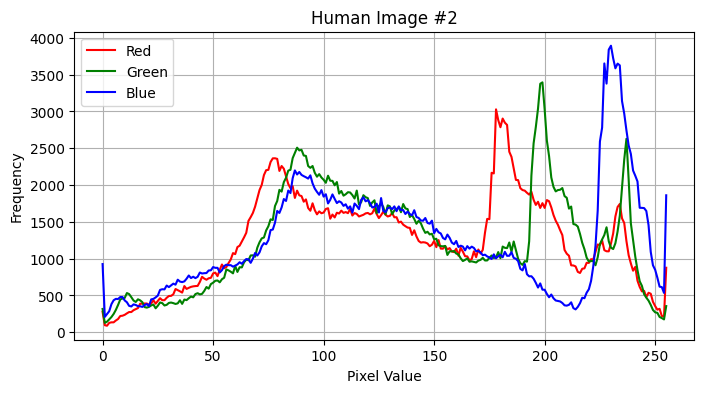

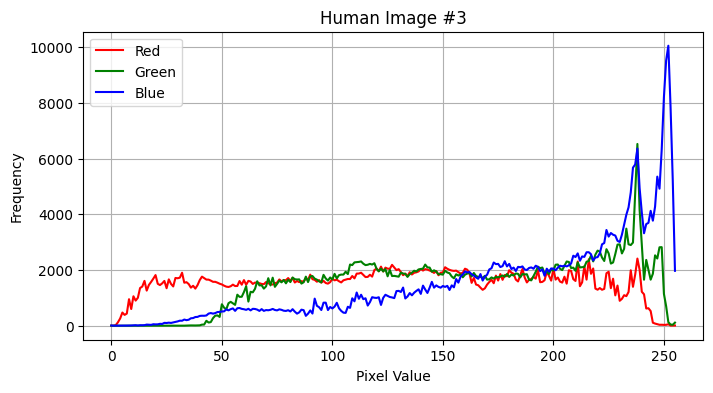

In [43]:
def plot_color_distribution(image_path, title="Color Distribution"):
    # Read and convert image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Plot histogram
    colors = ["Red", "Green", "Blue"]
    plt.figure(figsize=(8, 4))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color.lower(), label=color)
    
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_color_distributions_by_label(df, label, sample_size=3):
    sample_paths = df[df['label'] == label]['file_name'].sample(sample_size, random_state=42)
    for i, path in enumerate(sample_paths):
        plot_color_distribution(path, title=f"{'AI' if label == 1 else 'Human'} Image #{i+1}")

plot_color_distributions_by_label(train_df, label=1)  # AI images
plot_color_distributions_by_label(train_df, label=0)  # Human images


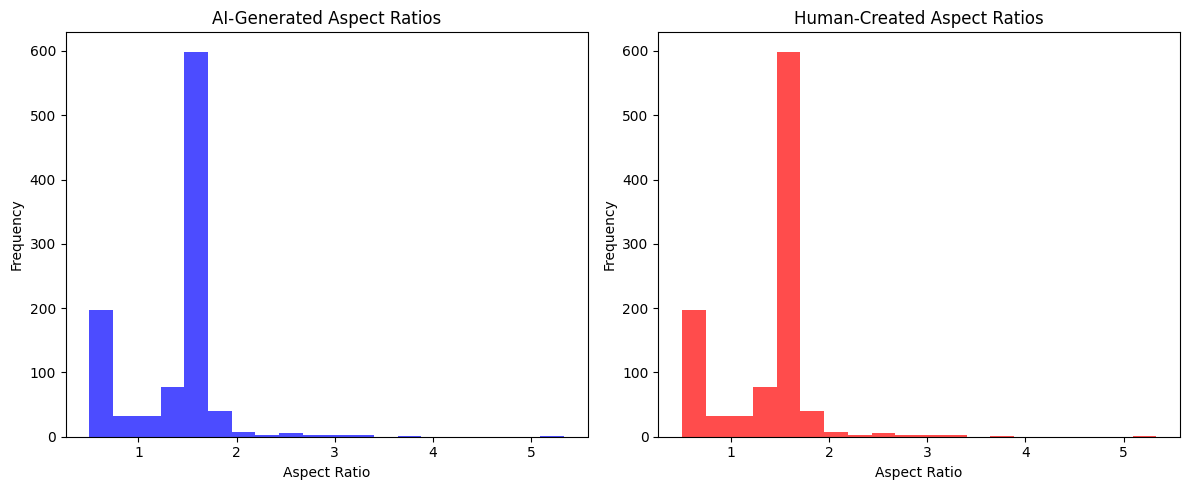

In [36]:
# Helper function to compute aspect ratios
def get_aspect_ratios(df, sample_size=1000):
    dims = get_image_dimension(df['file_name'], sample_size)
    dims['aspect_ratio'] = dims['width'] / dims['height']
    return dims['aspect_ratio']

# Function to plot side-by-side aspect ratio histograms
def plot_ai_human_aspect_ratios(df, sample_size=1000):
    ai_aspect = get_aspect_ratios(df[df['label'] == 1], sample_size)
    human_aspect = get_aspect_ratios(df[df['label'] == 0], sample_size)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].hist(ai_aspect, bins=20, color='blue', alpha=0.7)
    axes[0].set_title("AI-Generated Aspect Ratios")
    axes[0].set_xlabel("Aspect Ratio")
    axes[0].set_ylabel("Frequency")

    axes[1].hist(human_aspect, bins=20, color='red', alpha=0.7)
    axes[1].set_title("Human-Created Aspect Ratios")
    axes[1].set_xlabel("Aspect Ratio")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

plot_ai_human_aspect_ratios(train_df, sample_size=1000)


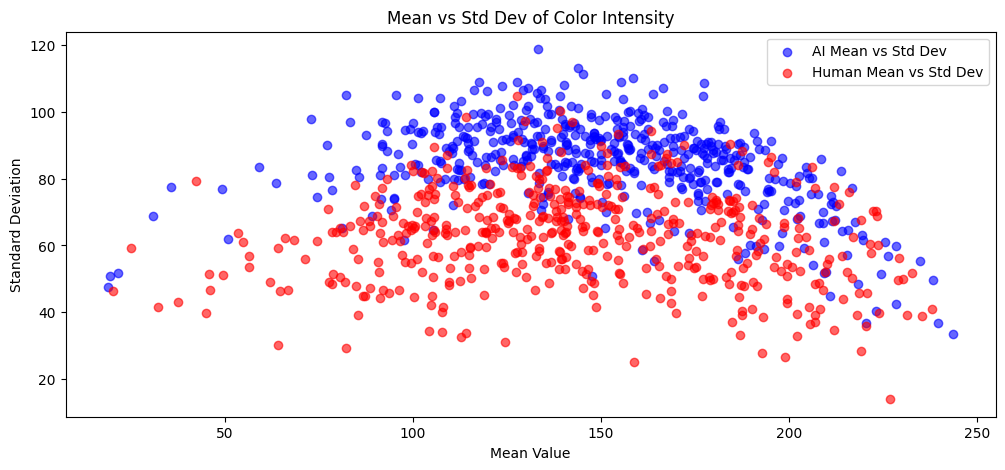

In [27]:
# Helper function to compute mean and std color stats
def get_color_stats(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return np.mean(img), np.std(img)

# Computes mean and std separately for a given label (0 = Human, 1 = AI)
def color_stats_by_label(df, label, sample_size=500):
    paths = df[df['label'] == label]['file_name'].sample(sample_size, random_state=42)
    means, stds = zip(*[get_color_stats(p) for p in paths])
    return pd.Series(means), pd.Series(stds)

# Plots side-by-side scatter plots of color mean and std
def plot_color_stats(df, sample_size=500):
    ai_means, ai_stds = color_stats_by_label(df, 1, sample_size)
    human_means, human_stds = color_stats_by_label(df, 0, sample_size)

    fig, axes = plt.subplots(1, 1, figsize=(12, 5))

    # Scatter plot for Mean Color Intensity
    axes.scatter(ai_means, ai_stds, alpha=0.6, color='blue', label='AI Mean vs Std Dev')
    axes.scatter(human_means, human_stds, alpha=0.6, color='red', label='Human Mean vs Std Dev')
    axes.set_title("Mean vs Std Dev of Color Intensity")
    axes.set_xlabel("Mean Value")
    axes.set_ylabel("Standard Deviation")
    axes.legend()


plot_color_stats(train_df, sample_size=500)


In [28]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage.feature import graycomatrix, graycoprops
# from skimage.color import rgb2gray
# from skimage import io

# # Helper function to compute texture features
# def compute_texture_features(image_path, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
#     # Read and convert the image to grayscale
#     img = cv2.imread(image_path)
#     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     # Calculate the GLCM (Gray Level Co-occurrence Matrix)
#     glcm = graycomatrix(gray_img, distances=distances, angles=angles, symmetric=True, normed=True)
    
#     # Extract texture features (Contrast, Dissimilarity, Homogeneity, Energy, Correlation)
#     contrast = graycoprops(glcm, 'contrast')
#     dissimilarity = graycoprops(glcm, 'dissimilarity')
#     homogeneity = graycoprops(glcm, 'homogeneity')
#     energy = graycoprops(glcm, 'energy')
#     correlation = graycoprops(glcm, 'correlation')
    
#     # Return texture features as a dictionary
#     features = {
#         'contrast': contrast.mean(),
#         'dissimilarity': dissimilarity.mean(),
#         'homogeneity': homogeneity.mean(),
#         'energy': energy.mean(),
#         'correlation': correlation.mean()
#     }
    
#     return features

# # Function to compute texture features for images with a specific label (AI or Human)
# def texture_stats_by_label(df, label, sample_size=500):
#     paths = df[df['label'] == label]['file_name'].sample(sample_size, random_state=42)
#     features_list = [compute_texture_features(p) for p in paths]
    
#     # Convert list of dictionaries into a DataFrame for easier analysis
#     texture_df = pd.DataFrame(features_list)
#     return texture_df

# # Function to compare texture features between AI and Human images
# def plot_texture_comparison(df, sample_size=500):
#     ai_texture = texture_stats_by_label(df, 1, sample_size)
#     human_texture = texture_stats_by_label(df, 0, sample_size)
    
#     # Plot side-by-side histograms for each texture feature
#     features = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
    
#     fig, axes = plt.subplots(3, 2, figsize=(12, 15))
#     axes = axes.ravel()
    
#     for i, feature in enumerate(features):
#         axes[i].hist(ai_texture[feature], bins=20, alpha=0.6, color='blue', label='AI')
#         axes[i].hist(human_texture[feature], bins=20, alpha=0.6, color='red', label='Human')
#         axes[i].set_title(f'{feature.capitalize()} Comparison')
#         axes[i].set_xlabel(feature.capitalize())
#         axes[i].set_ylabel('Frequency')
#         axes[i].legend()
    
#     plt.tight_layout()
#     plt.show()

# # Example usage: assuming you have a DataFrame `train_df` with 'label' and 'file_name' columns
# plot_texture_comparison(train_df, sample_size=500)


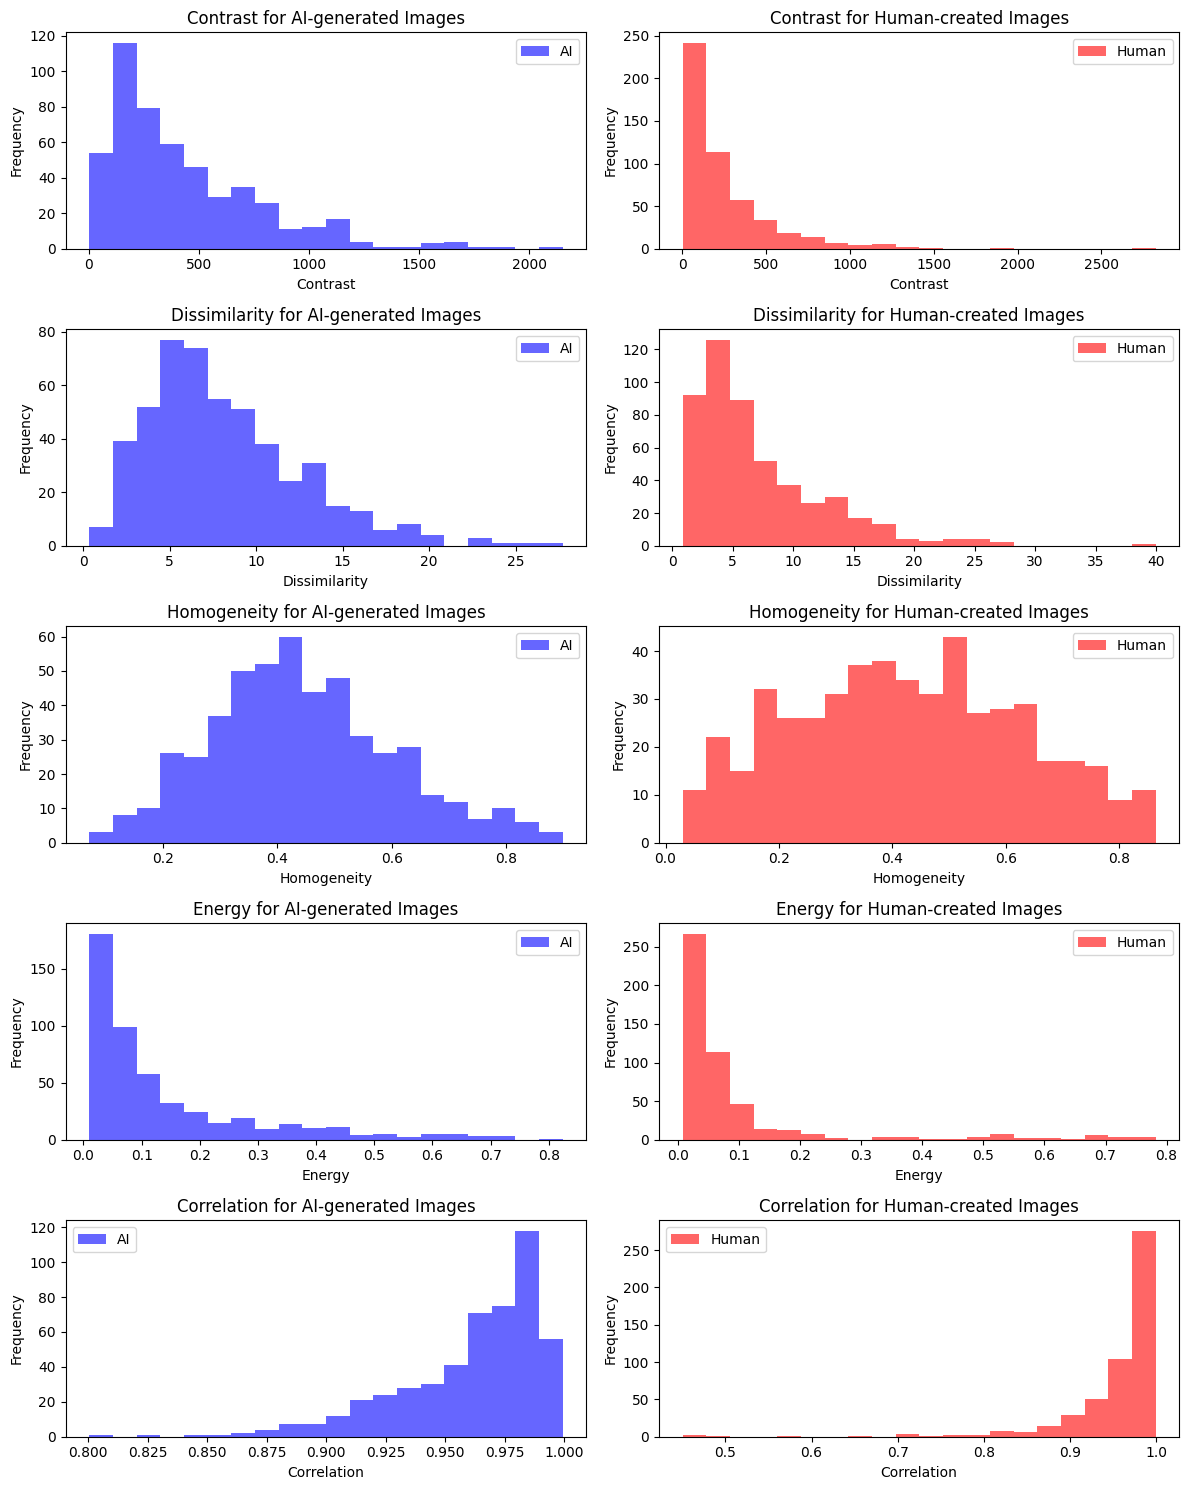

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage import io

# Helper function to compute texture features
def compute_texture_features(image_path, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    # Read and convert the image to grayscale
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Calculate the GLCM (Gray Level Co-occurrence Matrix)
    glcm = graycomatrix(gray_img, distances=distances, angles=angles, symmetric=True, normed=True)
    
    # Extract texture features (Contrast, Dissimilarity, Homogeneity, Energy, Correlation)
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    
    # Return texture features as a dictionary
    features = {
        'contrast': contrast.mean(),
        'dissimilarity': dissimilarity.mean(),
        'homogeneity': homogeneity.mean(),
        'energy': energy.mean(),
        'correlation': correlation.mean()
    }
    
    return features

# Function to compute texture features for images with a specific label (AI or Human)
def texture_stats_by_label(df, label, sample_size=500):
    paths = df[df['label'] == label]['file_name'].sample(sample_size, random_state=42)
    features_list = [compute_texture_features(p) for p in paths]
    
    # Convert list of dictionaries into a DataFrame for easier analysis
    texture_df = pd.DataFrame(features_list)
    return texture_df

# Function to compare texture features between AI and Human images, alternating between them
def plot_texture_comparison(df, sample_size=500):
    ai_texture = texture_stats_by_label(df, 1, sample_size)
    human_texture = texture_stats_by_label(df, 0, sample_size)
    
    # Features to compare
    features = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
    
    # Create a figure with subplots for each feature
    fig, axes = plt.subplots(5, 2, figsize=(12, 15))
    axes = axes.ravel()
    
    # Alternating between AI and Human
    for i, feature in enumerate(features):
        # Plot AI images
        axes[2*i].hist(ai_texture[feature], bins=20, alpha=0.6, color='blue', label='AI')
        axes[2*i].set_title(f'{feature.capitalize()} for AI-generated Images')
        axes[2*i].set_xlabel(feature.capitalize())
        axes[2*i].set_ylabel('Frequency')
        axes[2*i].legend()

        # Plot Human images
        axes[2*i + 1].hist(human_texture[feature], bins=20, alpha=0.6, color='red', label='Human')
        axes[2*i + 1].set_title(f'{feature.capitalize()} for Human-created Images')
        axes[2*i + 1].set_xlabel(feature.capitalize())
        axes[2*i + 1].set_ylabel('Frequency')
        axes[2*i + 1].legend()
    
    plt.tight_layout()
    plt.show()

# Example usage: assuming you have a DataFrame `train_df` with 'label' and 'file_name' columns
plot_texture_comparison(train_df, sample_size=500)


## Data Preprocessing